# DECISION TREE

### Tasks:
### 1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,roc_auc_score,confusion_matrix,classification_report


In [4]:
# ----------------------------
# LOAD DATASET
# ----------------------------
df = pd.read_csv("heart_disease.csv")

# Preview dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect,0.0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect,0.0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect,0.0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect,0.0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect,0.0


### 2. Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    float64
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    float64
 4   chol      908 non-null    float64
 5   fbs       908 non-null    object 
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    float64
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    float64
dtypes: float64(6), object(7)
memory usage: 101.6+ KB


In [6]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [7]:
df.isnull().sum()

age          91
sex          91
cp           91
trestbps     91
chol         91
fbs          91
restecg      91
thalch       91
exang        91
oldpeak     153
slope        91
thal         91
num          91
dtype: int64

In [8]:
# Separate numerical and categorical columns automatically
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values in numerical columns with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing values in categorical columns with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check again after filling
df.isnull().sum()

C:\Users\vanam\AppData\Local\Temp\ipykernel_13436\3719947626.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\vanam\AppData\Local\Temp\ipykernel_13436\3719947626.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [13]:
num_cols=df[ ['age','trestbps','chol','thalch','oldpeak']]

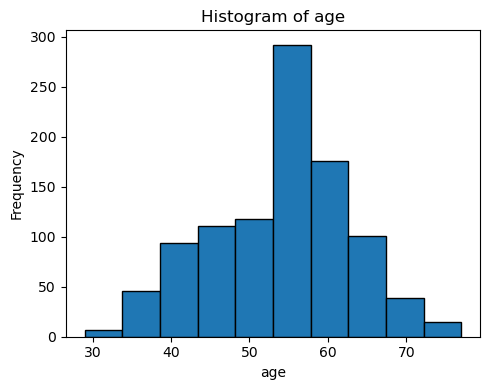

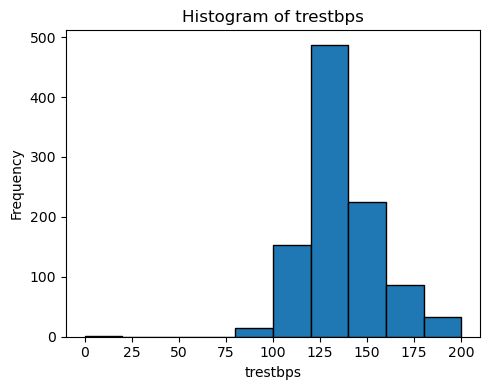

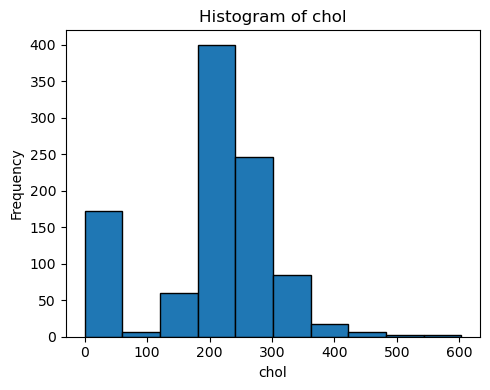

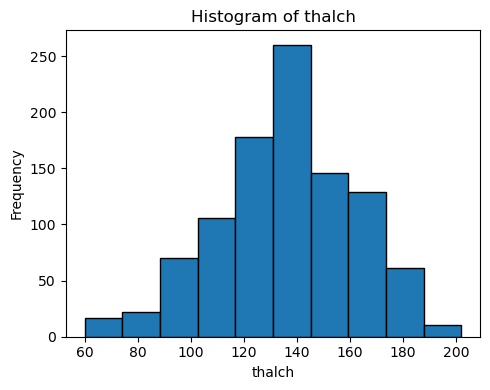

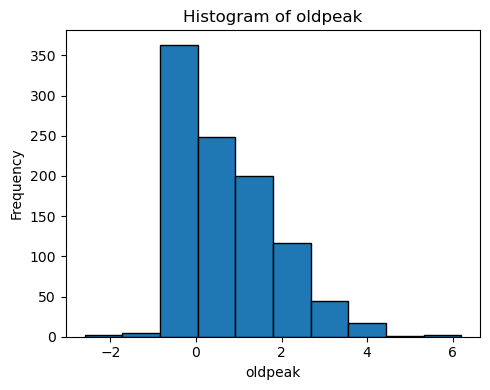

In [15]:
# ---------------------------------------------------
#  HISTOGRAMS 
# ---------------------------------------------------
import matplotlib.pyplot as plt
for col in num_cols.columns:
    plt.figure(figsize=(5, 4))        # create new figure for each plot
    plt.hist(num_cols[col], edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

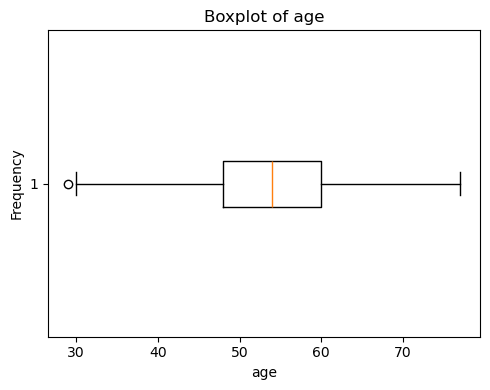

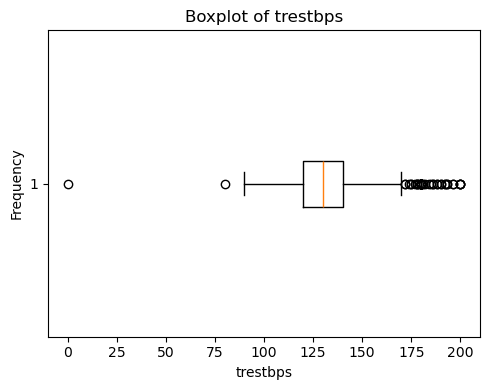

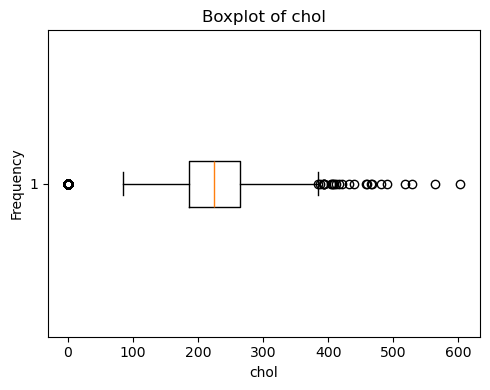

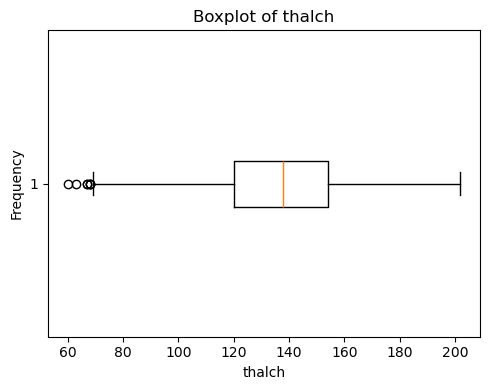

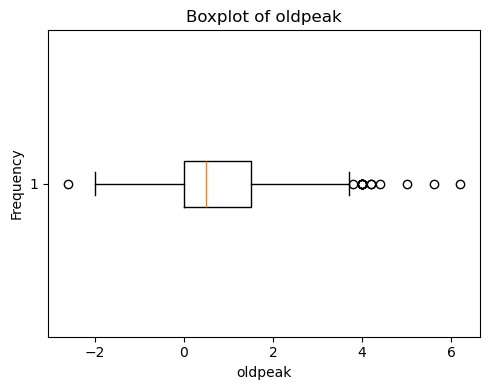

In [16]:
# ---------------------------------------------------
#  Boxplot
# ---------------------------------------------------
import matplotlib.pyplot as plt
for col in num_cols.columns:
    plt.figure(figsize=(5, 4))        
    plt.boxplot(num_cols[col],vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

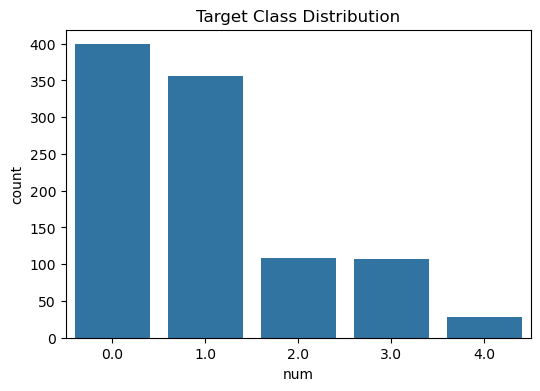

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['num'])
plt.title("Target Class Distribution")
plt.show()

### 3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [22]:
#Convert categorical columns to numeric using Label Encoding.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       999 non-null    float64
 1   sex       999 non-null    int64  
 2   cp        999 non-null    int64  
 3   trestbps  999 non-null    float64
 4   chol      999 non-null    float64
 5   fbs       999 non-null    int64  
 6   restecg   999 non-null    int64  
 7   thalch    999 non-null    float64
 8   exang     999 non-null    int64  
 9   oldpeak   999 non-null    float64
 10  slope     999 non-null    int64  
 11  thal      999 non-null    int64  
 12  num       999 non-null    float64
dtypes: float64(6), int64(7)
memory usage: 101.6 KB


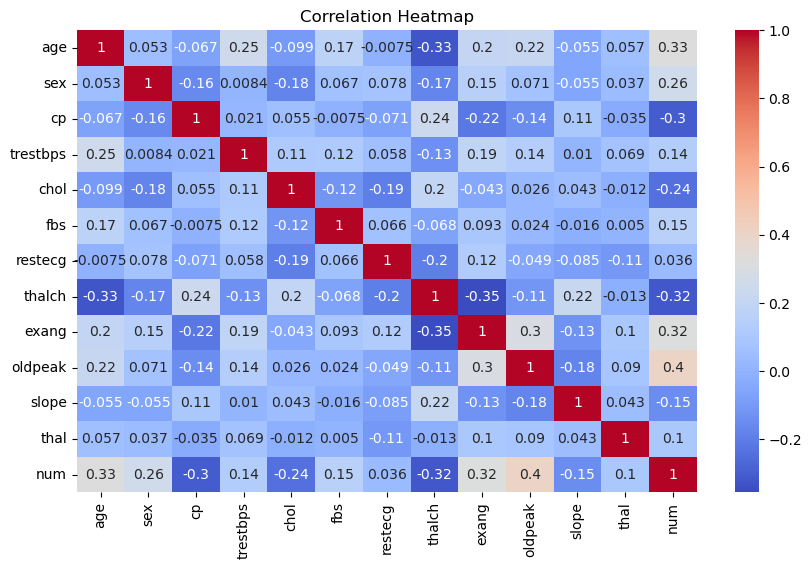

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### 4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).


In [25]:
# Define features and target
X = df.drop("num", axis=1)   
y = df["num"]

In [26]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
994    1.0
995    1.0
996    1.0
997    1.0
998    1.0
Name: num, Length: 999, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [28]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [29]:
y_pred

array([0., 0., 1., 1., 0., 1., 2., 1., 1., 1., 3., 1., 1., 0., 2., 0., 0.,
       1., 3., 2., 0., 0., 0., 1., 1., 0., 4., 2., 0., 1., 0., 0., 2., 0.,
       1., 3., 3., 0., 0., 0., 1., 1., 3., 0., 0., 1., 1., 0., 3., 1., 0.,
       2., 1., 0., 2., 0., 0., 0., 3., 1., 1., 0., 3., 2., 1., 2., 0., 0.,
       1., 2., 2., 2., 0., 1., 2., 0., 0., 1., 2., 3., 0., 3., 3., 0., 1.,
       2., 2., 2., 1., 3., 1., 3., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 3., 3., 0., 0., 3., 0., 0., 0., 0., 3., 0., 1., 0., 3., 0.,
       3., 2., 3., 2., 1., 1., 0., 1., 3., 0., 1., 1., 0., 2., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 3., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 3., 0., 0., 0., 1., 0., 3., 0., 0., 1., 3., 3.,
       1., 1., 0., 3., 1., 0., 0., 4., 0., 1., 1., 1., 2., 0., 0., 1., 1.,
       0., 2., 1., 4., 0., 2., 1., 1., 0., 0., 0., 1., 0.])

In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.49
Precision: 0.49512167931043854
Recall: 0.49
F1 Score: 0.49194435366739286

Classification Report:

              precision    recall  f1-score   support

         0.0       0.68      0.70      0.69        80
         1.0       0.54      0.49      0.51        71
         2.0       0.17      0.18      0.18        22
         3.0       0.11      0.14      0.12        21
         4.0       0.00      0.00      0.00         6

    accuracy                           0.49       200
   macro avg       0.30      0.30      0.30       200
weighted avg       0.50      0.49      0.49       200



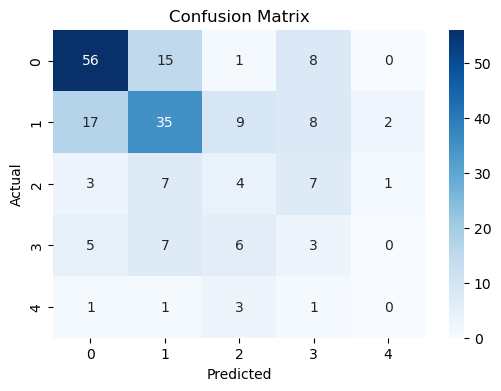

In [31]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 5. Hyperparameter Tuning:
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.


In [33]:

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,5,7,10, None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                    param_grid,
                    cv=5,
                    scoring='accuracy')

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.6145283018867925


In [37]:

best_dt = grid.best_estimator_
best_pred = best_dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, best_pred))
print("Classification Report:\n", classification_report(y_test, best_pred))



Accuracy: 0.495
Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      0.70      0.66        80
         1.0       0.50      0.49      0.50        71
         2.0       0.18      0.14      0.15        22
         3.0       0.21      0.24      0.22        21
         4.0       0.00      0.00      0.00         6

    accuracy                           0.49       200
   macro avg       0.30      0.31      0.31       200
weighted avg       0.47      0.49      0.48       200



C:\Users\vanam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vanam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vanam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


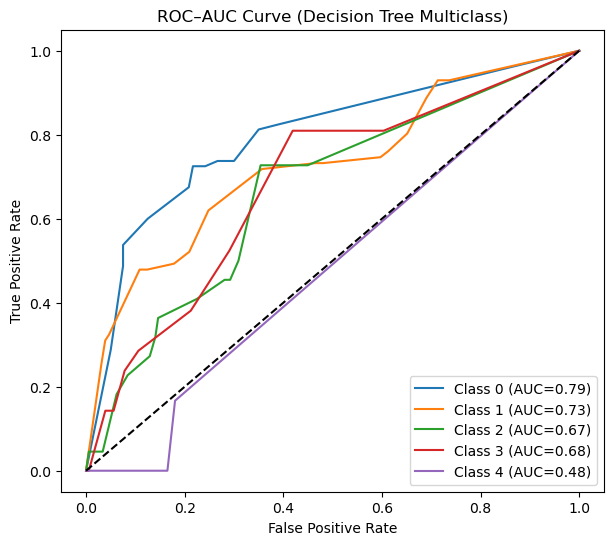

In [38]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# Binarize target (needed for multi-class ROC)
y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4])

# One-vs-Rest Decision Tree
ovr = OneVsRestClassifier(best_dt)
ovr.fit(X_train, label_binarize(y_train, classes=[0,1,2,3,4]))

# Predicted probabilities
y_prob = ovr.predict_proba(X_test)

# ROC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
plt.figure(figsize=(7,6))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC={roc_auc[i]:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curve (Decision Tree Multiclass)")
plt.legend()
plt.show()

### 6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model and identify important features


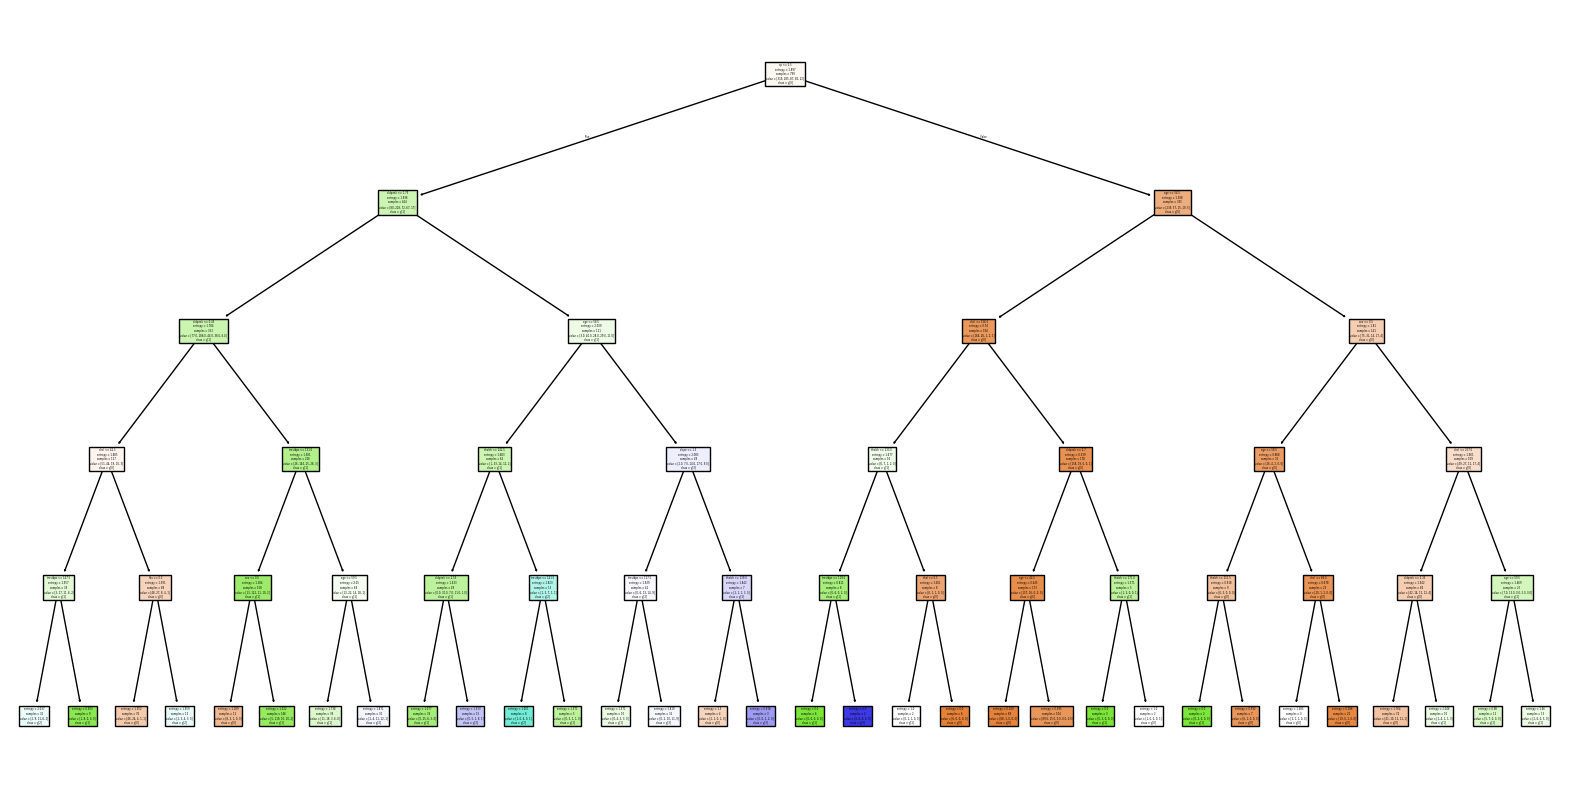

In [39]:
plt.figure(figsize=(20,10))
plot_tree(best_dt, feature_names=X.columns, class_names=True, filled=True)
plt.show()

### Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Hyperparameter	Meaning	Effect

1.max_depth	---  Maximum depth of tree	--- Prevents overfitting
2.min_samples_split --- Minimum samples to split node	--- Higher = simpler tree
3.min_samples_leaf---	Minimum leaf size--	Reduces overfitting
4.criterion---	"gini" or "entropy"	---Splitting quality measure
5.max_features---Number of features to consider---Helps generalization

2. What is the difference between the Label encoding and One-hot encoding?
   Label Encoding and One-Hot Encoding are both methods for converting categorical variables into numerical form, but they work very differently and are suited for different types of models. Label Encoding assigns each category a unique number, which is simple and efficient but introduces an artificial order between categories that may not actually exist; this can mislead models that rely on distance or magnitude (like linear regression or SVM). It works best for tree-based models such as Decision Trees, Random Forests, and XGBoost, which can naturally handle label-encoded integers without assuming order. In contrast, One-Hot Encoding creates a separate binary column for each category, representing categories as vectors with no implied ranking. This avoids introducing false order and is therefore preferred for linear and distance-based models, such as Logistic Regression, k-NN, and SVM, which rely on numeric relationships that should not be distorted. Overall, Label Encoding is compact but may distort relationships, while One-Hot Encoding is more accurate but increases dimensionality.